# Exercise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [20]:
#1
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples = 50, n_features = 10, coef=True,
                         random_state=42, bias=6)

#perform Ridge regression
#plot y as ridge coefficients and coefficient error and x as alpha
#interpret what is happening
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)

# Solution

Text(0.5, 1.0, 'alpha and coefficients error')

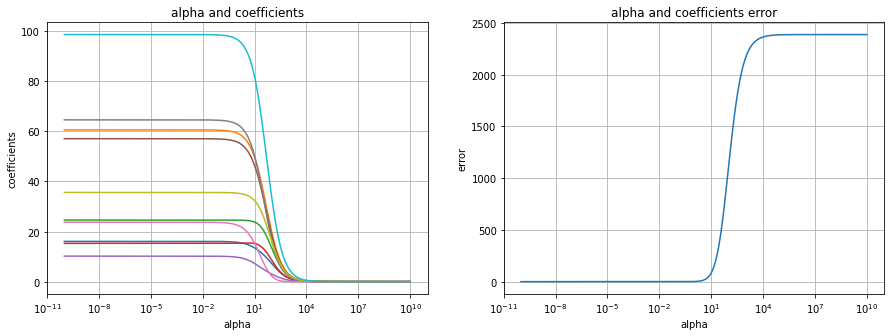

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

coefs = []
coefs_errors = []

alphas = np.logspace(-10, 10, 200)

#loop through
for a in alphas:
    model = Ridge(alpha = a)
    model.fit(X, y)
    coefs.append(model.coef_)
    coefs_errors.append(mean_squared_error(model.coef_, coef))

# Display results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].grid()
ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('coefficients')
ax[0].set_title('alpha and coefficients')

ax[1].grid()
ax[1].plot(alphas, coefs_errors)
ax[1].set_xscale('log')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('error')
ax[1].set_title('alpha and coefficients error')

'''
For big alpha, coefficients are moving to zero, forcing the model
to be a simpler version.  

For the right graph, interestingly, increasing the alpha way too much
result in errors, once pass 10e-01.  Thus alpha should always be
tune carefully via GridsearchCV or cross validation

'''